In [69]:
import Funcs as F
import numpy as np
from node2vec import Node2Vec as n2v
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix, classification_report
from itertools import product
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from scipy import spatial

In [3]:
T_train, T_test = F.read_data(have = True)
graph = F.bipartite(T_train)
g_emb = n2v(graph, dimensions=16, workers = 8)

Computing transition probabilities: 100%|██████████████████████████████████████████| 2625/2625 [04:42<00:00,  9.30it/s]


In [7]:
WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

mdl = g_emb.fit(
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

# create embeddings dataframe
emb_df = (
    pd.DataFrame(
        [mdl.wv.get_vector(str(n)) for n in graph.nodes()],
        index = graph.nodes
    )
)

emb_df.head()

             0         1         2         3         4         5         6   \
user0 -0.317719 -0.629533  0.180381  0.385514  0.132162  0.854737  1.452232   
item0  0.564362  0.468014 -0.833249  0.547564  1.064128 -0.101957  0.723774   
item1 -0.653348 -0.401122 -0.441930  1.242717  0.846499 -0.246260  1.003379   
item2  0.311730 -0.150341 -0.574345  1.732418  2.113541  0.225163 -0.387256   
item3  0.185910  0.084542 -0.539791  1.019880  1.218901  0.093642  0.903237   

             7         8         9         10        11        12        13  \
user0 -0.235984 -0.204707  0.407866  0.187117 -0.296001  0.405137  0.121973   
item0 -0.768631 -0.930997 -0.263030 -1.184637 -0.024259  0.087861 -0.413586   
item1 -0.547404 -1.035369 -0.449224 -1.100949  0.257222 -1.547532 -1.195565   
item2 -0.472903 -1.855204 -0.213433 -1.192544  0.501619 -0.018594  0.325650   
item3 -0.663909 -0.652089 -0.417386 -0.904492 -0.536514 -1.564559 -0.730961   

             14        15  
user0  0.497999  1.061

In [30]:
user,item = np.nonzero(T_test)

In [33]:
user,item = np.nonzero(T_test)
pred = []
real = []
for i,j in zip(user, item):
    pred.append(spatial.distance.cosine(df.loc['user'+str(i)],df.loc['item'+str(j)]))
    if T_test[i,j] > 2:
        real.append(1)
    else:
        real.append(0)

In [32]:
df = emb_df

In [41]:
graph = nx.gnp_random_graph(6,.4)

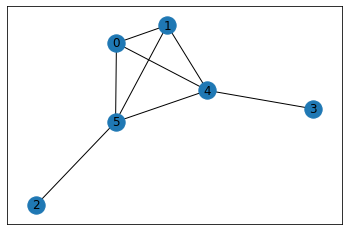

In [42]:
import matplotlib.pyplot as plt
nx.draw_networkx(graph)
plt.show()

In [12]:
g_emb = n2v(graph, dimensions=4, workers = 8)

Computing transition probabilities: 100%|████████████████████████████████████████████| 10/10 [00:00<00:00, 3330.40it/s]


In [13]:
WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

mdl = g_emb.fit(
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

# create embeddings dataframe
emb_df = (
    pd.DataFrame(
        [mdl.wv.get_vector(str(n)) for n in graph.nodes()],
        index = graph.nodes
    )
)

emb_df.head()

,0,1,2,3
0,-0.082607,-1.085425,0.371186,0.383350
1,0.219069,-0.991529,0.170554,0.613072
2,-0.115214,-1.144026,0.012316,0.449606
3,0.229879,-1.111298,0.128177,0.391427
4,0.260958,-0.966543,0.419349,0.549653


In [14]:
emb_df

,0,1,2,3
0,-0.082607,-1.085425,0.371186,0.383350
1,0.219069,-0.991529,0.170554,0.613072
2,-0.115214,-1.144026,0.012316,0.449606
3,0.229879,-1.111298,0.128177,0.391427
4,0.260958,-0.966543,0.419349,0.549653
5,-0.047055,-1.047140,0.140915,0.556515
6,0.042544,-0.968963,0.302378,0.683870
7,0.264617,-1.131047,0.240462,0.362307
8,-0.183098,-0.997911,0.329003,0.637630
9,0.159022,-1.184862,0.012012,0.318967


In [16]:
from scipy import spatial
spatial.distance.cosine(emb_df.loc[0],emb_df.loc[9])

0.0669286847114563

In [19]:
spatial.distance.cosine(emb_df.loc[7],emb_df.loc[3])

0.004661381244659424

In [20]:
node1 = -1
node2 = -1
maxx = 0
for i in range(10):
    for j in range(10):
        if i != j:
            temp = spatial.distance.cosine(emb_df.loc[i],emb_df.loc[j])
            if temp > maxx:
                maxx = temp
                node1 = i
                node2 = j

In [23]:
node1

2

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
import Funcs as F

In [13]:
T_train, T_test = F.read_data(have = True)

# V = pd.DataFrame(V, columns=['John', 'Alice', 'Mary', 'Greg', 'Peter', 'Jennifer'])
# V.index = ['Vegetables', 'Fruits', 'Sweets', 'Bread', 'Coffee']

nmf = NMF(8)
nmf.fit(T_train)
items = np.round(nmf.components_,2).T

nmf = NMF(8)
nmf.fit(T_train.T)
users = np.round(nmf.components_,2).T

C:\Users\Esysss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\Esysss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [1]:
import Funcs as F
import numpy as np
from node2vec import Node2Vec as n2v
import pandas as pd
from scipy import spatial
from sklearn.metrics import accuracy_score

C:\Users\Esysss\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
T_train, T_test = F.read_data(have = True)
graph = F.bipartite(T_train)
g_emb = n2v(graph, dimensions=16, workers=8)

WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

mdl = g_emb.fit(
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

# create embeddings dataframe
df = (
    pd.DataFrame(
        [mdl.wv.get_vector(str(n)) for n in graph.nodes()],
        index = graph.nodes
    )
)
#df is the 1st features

Computing transition probabilities: 100%|████████████████████████████████████████| 2625/2625 [00:01<00:00, 2511.90it/s]


In [3]:
graph = F.bipartite(T_train)
emb = F.features(graph,T_test, have=True)
# emb is the 2nd features

In [26]:
users,items = F.nmf(T_train,8)
columni = ['item{}'.format(i) for i in range(len(items))]
columnu = ['user{}'.format(i) for i in range(len(users))]
df21 = pd.DataFrame(users, index = columnu)
df22 = pd.DataFrame(items,index=columni)
df2 = df21.append(df22)

#users and items are the final feature sets

C:\Users\Esysss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\Esysss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\Esysss\AppData\Local\Temp\ipykernel_11932\1134030659.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df21.append(df22)


In [9]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
user0,0.042256,0.006009,-0.010486,0.037897,-0.018248,0.033880,-0.025498,-0.024786,0.005806,0.032693,-0.031547,0.015450,0.046533,-0.054948,0.044928,0.048994
item0,-0.048717,-0.021689,0.037426,-0.012828,-0.052761,0.029288,0.053519,-0.043350,0.005785,-0.012386,-0.003148,-0.068836,0.016316,-0.043867,-0.002376,-0.008292
item1,0.003927,-0.053949,0.041809,-0.018272,0.023128,0.020529,0.057160,0.053627,0.045699,-0.052152,0.006811,-0.007044,0.005258,0.053888,0.029474,-0.055767
item2,-0.051630,0.023733,0.026317,0.019309,0.036911,-0.042368,-0.005764,-0.017710,-0.009726,0.027952,0.007890,-0.047343,0.019768,0.037534,-0.039300,0.020824
item3,0.061604,-0.005150,0.003850,0.032888,-0.038342,-0.001424,0.011061,0.043504,0.026074,-0.012349,-0.054067,-0.025814,0.054982,-0.061677,0.060746,-0.001285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user938,0.053180,0.041153,-0.002486,-0.012093,-0.045760,-0.046516,-0.003997,-0.002853,0.051060,-0.058706,0.042141,0.045167,0.056786,-0.024122,0.037770,0.050305
user939,0.033450,-0.015477,-0.025413,0.011660,0.036270,-0.001927,0.059590,0.050213,0.057923,0.059880,0.033030,-0.045020,0.039387,0.044410,0.000965,-0.045455
user940,0.052100,-0.057349,-0.044605,-0.019044,0.017186,-0.006949,-0.056251,-0.031726,-0.010673,0.011375,0.012066,-0.045785,0.000027,-0.029642,0.003392,0.055283
user941,-0.028706,-0.001293,-0.048913,-0.022930,-0.019420,0.023270,-0.028482,-0.048901,0.047237,0.002435,-0.007352,0.021827,-0.036113,0.011239,0.039780,-0.054553


In [31]:
df1 = pd.DataFrame.from_dict(emb,orient = 'index')
df1.columns = range(16,19)
df1

,16,17,18
user0,262,0.003263,0.408723
user1,52,0.000182,0.383066
user2,44,0.000143,0.377337
user3,14,0.000035,0.362832
user4,165,0.001036,0.384638
...,...,...,...
item1645,1,0.000000,0.319883
item1652,1,0.000000,0.269322
item1655,1,0.000000,0.290298
item1661,1,0.000000,0.287121


In [35]:
df2.columns = range(19,27)
df2

,19,20,21,22,23,24,25,26
user0,1.57,0.07,1.96,0.0,0.00,1.23,1.24,0.00
user1,0.00,0.80,0.69,0.0,1.01,0.00,0.00,0.00
user2,0.10,0.00,0.00,0.0,1.02,0.00,0.00,0.00
user3,0.02,0.00,0.00,0.0,0.56,0.01,0.05,0.00
user4,0.00,0.00,0.36,0.0,0.00,1.29,0.96,0.04
...,...,...,...,...,...,...,...,...
item1677,0.00,0.00,0.00,0.0,0.03,0.00,0.00,0.00
item1678,0.00,0.00,0.00,0.0,0.08,0.00,0.00,0.00
item1679,0.00,0.00,0.00,0.0,0.05,0.00,0.00,0.00
item1680,0.01,0.00,0.00,0.0,0.00,0.02,0.01,0.00


In [53]:
final_dict = {}
for i in df1.index:
    final_dict[i] = list(df.loc[i]) + list(df1.loc[i]) + list(df2.loc[i])

In [55]:
final_df = pd.DataFrame.from_dict(final_dict,orient = 'index')
final_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
user0,0.042256,0.006009,-0.010486,0.037897,-0.018248,0.033880,-0.025498,-0.024786,0.005806,0.032693,...,0.003263,0.408723,1.57,0.07,1.96,0.0,0.00,1.23,1.24,0.00
user1,0.003334,0.013175,0.042692,0.055513,0.018640,-0.030809,-0.004304,0.007328,-0.016418,0.017220,...,0.000182,0.383066,0.00,0.80,0.69,0.0,1.01,0.00,0.00,0.00
user2,-0.028168,0.049560,0.052277,-0.013860,0.000972,-0.062186,-0.037975,0.004942,0.030331,-0.028604,...,0.000143,0.377337,0.10,0.00,0.00,0.0,1.02,0.00,0.00,0.00
user3,0.039137,0.033478,0.035625,-0.037333,-0.060772,0.013164,0.058966,0.060168,-0.062384,0.051790,...,0.000035,0.362832,0.02,0.00,0.00,0.0,0.56,0.01,0.05,0.00
user4,-0.044577,-0.022218,-0.015356,-0.013925,0.022382,0.047886,-0.060060,-0.058486,-0.055062,-0.005857,...,0.001036,0.384638,0.00,0.00,0.36,0.0,0.00,1.29,0.96,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
item1645,0.054407,-0.037399,-0.043502,0.041173,0.000189,-0.035650,0.009226,-0.009388,0.019414,-0.034044,...,0.000000,0.319883,0.01,0.00,0.06,0.0,0.01,0.00,0.00,0.00
item1652,-0.050988,0.027809,-0.017938,-0.001003,-0.008525,0.027826,-0.062374,0.049681,0.050186,0.040928,...,0.000000,0.269322,0.00,0.00,0.01,0.0,0.02,0.00,0.00,0.00
item1655,-0.004018,-0.043309,-0.028456,-0.010939,0.022637,0.041359,-0.038068,-0.003820,-0.040604,-0.022046,...,0.000000,0.290298,0.00,0.00,0.12,0.0,0.00,0.01,0.00,0.00
item1661,-0.037866,-0.005829,0.044695,-0.010112,0.049290,-0.010486,-0.035211,0.013480,-0.058295,-0.015870,...,0.000000,0.287121,0.00,0.00,0.00,0.0,0.11,0.00,0.00,0.00


In [56]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=8)
pca.fit(final_df.T)

PCA(n_components=8)

In [65]:
pcaOutput = pca.components_
pcaOutput.shape

(8, 2072)

In [67]:
concat = list(final_df.index)

In [68]:
concat.index('user5')

5

In [71]:
user,item = np.nonzero(T_test)
pred = []
real = []
for i,j in zip(user, item):
    pred.append(spatial.distance.cosine(pcaOutput[:,concat.index('user'+str(i))],
                                        pcaOutput[:,concat.index('item'+str(j))]))
    if T_test[i,j] > 2:
        real.append(1)
    else:
        real.append(0)

In [76]:
pred = np.array(pred)
real = np.array(real)
p = pred.copy()

threshold = 1
p[pred <= threshold] = 1
p[pred > threshold] = 0

print(accuracy_score(real,p))

0.7497348886532343


In [1]:
import Funcs as F
import numpy as np
# from Merges import *
import pandas as pd
# from Recomms import *
# from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import precision_score, ndcg_score, f1_score, accuracy_score
from tqdm import tqdm

In [2]:
T_train, T_test = F.read_data(have = True)

In [3]:
def make_data(users, items, T):
    lst = []
    for user in users:
        address = np.nonzero(T[user,items])[0]
        lst += [(user,i,T[user,i]) for i in address if T[user,i] != 0]

    df = pd.DataFrame(lst, columns=['userID', 'itemID', 'rating'])
    return df

In [5]:
make_data(list(range(T_train.shape[0])),list(range(T_train.shape[1])),T_test)

,userID,itemID,rating
0,0,19,4
1,0,32,4
2,0,60,4
3,0,116,3
4,0,154,2
...,...,...,...
9425,942,231,4
9426,942,355,4
9427,942,569,1
9428,942,807,4
